In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("/home/project/data/Car_sale_ads.csv")
list(df.columns)
df.head()

Index  Price Currency Condition Vehicle_brand Vehicle_model  \
0      0  86200      PLN       New        Abarth           595   
1      1  43500      PLN      Used        Abarth         Other   
2      2  44900      PLN      Used        Abarth           500   
3      3  39900      PLN      Used        Abarth           500   
4      4  97900      PLN       New        Abarth           595   

  Vehicle_version Vehicle_generation  Production_year  Mileage_km  ...  \
0             NaN                NaN             2021         1.0  ...   
1             NaN                NaN             1974     59000.0  ...   
2             NaN                NaN             2018     52000.0  ...   
3             NaN                NaN             2012     29000.0  ...   
4             NaN                NaN             2021       600.0  ...   

   Transmission        Type Doors_number  Colour Origin_country First_owner  \
0        Manual  small_cars          3.0    gray            NaN         NaN   
1        Manual       coupe          2.0  silver            NaN         NaN   
2     Automatic  small_cars          3.0  silver            NaN         NaN   
3        Manual  small_cars          3.0    gray            NaN         NaN   
4        Manual  small_cars          3.0    blue            NaN         NaN   

  First_registration_date  Offer_publication_date  \
0                     NaN              04/05/2021   
1                     NaN              03/05/2021   
2                     NaN              03/05/2021   
3                     NaN              30/04/2021   
4                     NaN              30/04/2021   

                                      Offer_location  \
0  ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...   
1  kanonierska12 - 04-425 Warszawa, Rembertów (Po...   
2                   Warszawa, Mazowieckie, Białołęka   
3                                  Jaworzno, Śląskie   
4  ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...   

                                            Features  
0                                                 []  
1                                                 []  
2  ['ABS', 'Electric front windows', 'Drivers air...  
3  ['ABS', 'Electric front windows', 'Drivers air...  
4  ['ABS', 'Electrically adjustable mirrors', 'Pa...  

[5 rows x 25 columns]

In [4]:
price = df["Price"].copy()
currency = df["Currency"].copy()

for idx, (p, c) in enumerate(zip(price, currency)):
    if c == "EUR":
        price_PLN = p * 4.6
        price[idx] = price_PLN
        currency[idx] = "PLN"


df["Currency"] = currency
df["Price"] = price


cols2add = ["Price", "Condition", "Vehicle_brand", "Vehicle_model", "Vehicle_version","Vehicle_generation", "Production_year", "Mileage_km", "Power_HP", "Displacement_cm3", "Fuel_type"]
test_df = df[cols2add]

In [5]:
test_df.head()

Price Condition Vehicle_brand Vehicle_model Vehicle_version  \
0  86200.0       New        Abarth           595             NaN   
1  43500.0      Used        Abarth         Other             NaN   
2  44900.0      Used        Abarth           500             NaN   
3  39900.0      Used        Abarth           500             NaN   
4  97900.0       New        Abarth           595             NaN   

  Vehicle_generation  Production_year  Mileage_km  Power_HP  Displacement_cm3  \
0                NaN             2021         1.0     145.0            1400.0   
1                NaN             1974     59000.0      75.0            1100.0   
2                NaN             2018     52000.0     180.0            1368.0   
3                NaN             2012     29000.0     160.0            1368.0   
4                NaN             2021       600.0     165.0            1368.0   

  Fuel_type  
0  Gasoline  
1  Gasoline  
2  Gasoline  
3  Gasoline  
4  Gasoline

In [29]:
audi_cars = test_df[test_df['Vehicle_brand'] == "Audi"]
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()

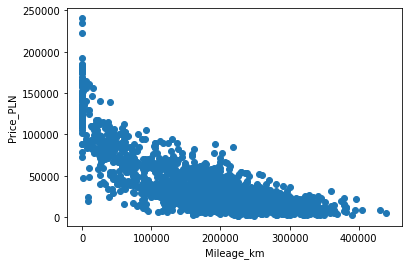

In [7]:
import matplotlib.pyplot as plt
def price_plot(df, column_name):
    price = df["Price"]
    data = df[column_name]
    plt.plot(data,price, 'o')
    plt.xlabel(column_name)
    plt.ylabel("Price_PLN")

def plot_mean(df, column_name, round_it=False):
    if round_it:
        df = df.round(-1)
    mean_values = df.groupby(column_name)['Price'].mean()

    # Plotting the mean values
    mean_values.plot()

    # Adding labels and title to the plot
    plt.xlabel(column_name)
    plt.ylabel('Price_PLN')
    plt.title("Mean price of car by category")

price_plot(audi_a3_cars, "Mileage_km")

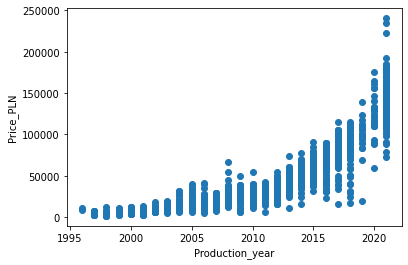

In [8]:
price_plot(audi_a3_cars,"Production_year")

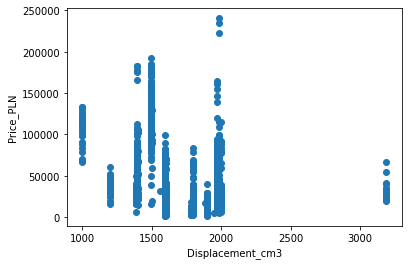

In [9]:
price_plot(audi_a3_cars, "Displacement_cm3")

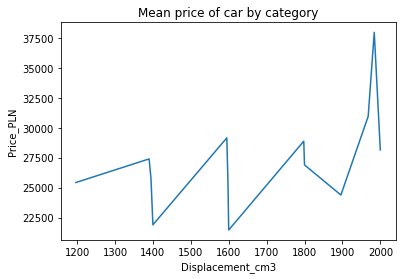

In [10]:
plot_mean(audi_a3_2010, "Displacement_cm3")

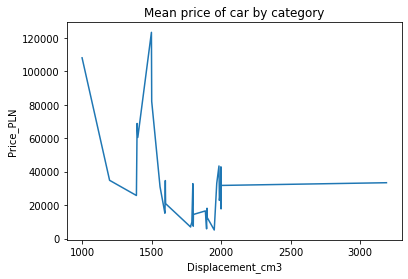

In [11]:
plot_mean(audi_a3_cars, "Displacement_cm3")

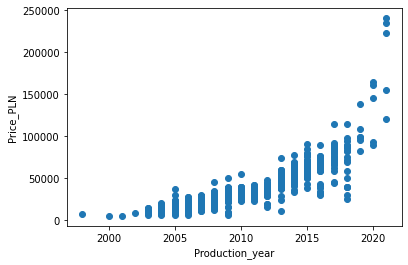

In [12]:
price_plot(audi_a3_2000ccm, "Production_year")

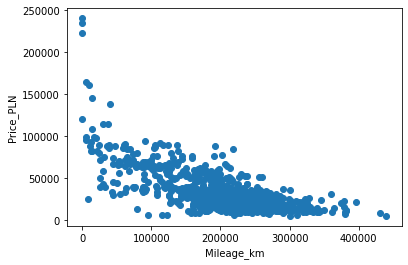

In [13]:
price_plot(audi_a3_2000ccm, "Mileage_km")

In [30]:
import pandas as pd
import cmdstanpy

data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}


model = cmdstanpy.CmdStanModel(stan_file='car_price_1.stan')

In [37]:
fit = model.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


10:22:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▎         | 00:00 Status


chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)

chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 1 |█▎        | 00:03 Iteration:  200 / 3000 [  6%]  (Warmup)


chain 1 |█▌        | 00:05 Iteration:  300 / 3000 [ 10%]  (Warmup)




chain 1 |█▉        | 00:07 Iteration:  400 / 3000 [ 13%]  (Warmup)
chain 1 |██▏       | 00:07 Iteration:  500 / 3000 [ 16%]  (Warmup)


chain 1 |██▊       | 00:08 Iteration:  700 / 3000 [ 23%]  (Warmup)
chain 1 |███▏      | 00:08 Iteration:  800 / 3000 [ 26%]  (Warmup)
chain 1 |████      | 00:08 Iteration: 1001 / 3000 [ 33%]  (Sampling)

chain 1 |████▍     | 00:09 Iteration: 1100 / 3000 [ 36%]  (Sampling)
chain 1 |████▋     | 00:10 Iteration: 1200 / 3000 [ 40%]  (Sampling)
chain 1 |█████▎    | 00:11 Iteration: 1400 / 3000 [ 46%]  (Sampling)


chain 1 |█████▋    | 00:11 Iteration: 1500 / 30


10:23:38 - cmdstanpy - INFO - CmdStan done processing.


10:23:38 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 238 iterations at max treedepth (11.9%)
	Chain 4 had 23 iterations at max treedepth (1.1%)
	Use function "diagnose()" to see further information.


In [ ]:
fit_pd = fit.draws_pd()
fit_pd

In [ ]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

In [ ]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()